In [6]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import helper_line as hp
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time as tm

In [7]:
data = pd.read_csv("wdbc.csv")
X = data.drop(['0'], axis=1).values
scaler = preprocessing.StandardScaler().fit(X) # scaling  element  
X = scaler.transform(X)## scaling transformation
YD = data[["0"]].values 
YL =[]
for i in YD:                      ## replacing M by 1 and B by 0
    if i == "M":
        YL.append(1)
    else:
        YL.append(0)
Y = np.asarray(YL)
Y = np.reshape(Y, (len(Y),1))
x_train = X[1:500]              ## Deviding data into train and test datasets
x_test = X[500:]

y_train = Y[1:500]
y_test = Y[500:]

In [9]:
len(x_train[1])

11

In [61]:
no_steps = 100
loss_list = []  ## to store loss
step_size_list = [] ## to store line search step size
Hess = np.identity(11)  ## initializing the hessian as an identity matrix

B = np.random.standard_normal(size = (11,1)) ## initializing the coefficients
logit = hp.logits(B,x_train)
w = hp.activation_sigmoid(logit)
grad_ini = hp.gradient(x_train,y_train,w)
grad_fin = 0


## this loop is the quasi newton method
for i in range(no_steps):
    loss = hp.neg_log_likely(y_train,w)[0]
    loss_list.append(loss)
    p = -(Hess.dot(grad_ini))
    a =  hp.line_search(B,1,0.01,x_train,y_train,0.5)
    step_size_list.append(a)
    B += a*p
    logit = hp.logits(B,x_train)
    w = hp.activation_sigmoid(logit)
    grad_fin = hp.gradient(x_train,y_train,w)
    z = grad_fin -grad_ini
    s = a*p
    rho = 1/np.dot(z.T,s)
    tau = rho*np.dot(s,z.T)
    I = np.identity(11)
    Hess =  np.dot(np.dot((I - tau),Hess),(I - tau.T)) + rho*np.dot(s,s.T)
    ## the above formulation is the limited memory BFGS approximation for the hessian
    grad_ini = grad_fin
    
    
    
    

C:\Users\ashut\Desktop\SDS 385\Exercise_3\helper_line.py:59: RuntimeWarning: divide by zero encountered in log
  l = -(np.nan_to_num(np.dot(y.transpose(), np.log(w))) + np.nan_to_num(np.dot((1-y).transpose(), np.log(1-w))))


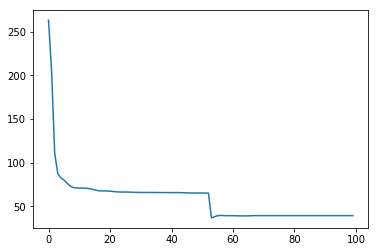

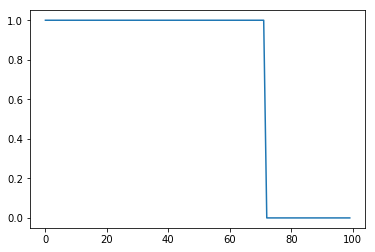

In [64]:
plt.plot(loss_list)
plt.show()
plt.plot(step_size_list )
plt.show()

In [65]:
### step size reduces to a very small quantity at the 70th something step and thus it indicates
### convergence, as line search is itself based on convergence

In [66]:
## lets test the accuracy on the test set
pred = hp.predict_binary(B,x_test,0.5)
accuracy = hp.accuracy(y_test,pred, j =0)

In [67]:
print("prediction Accuracy is: ", accuracy)

prediction Accuracy is:  0.9130434782608695


In [ ]:
## 91 percent, wohoo!